In [1]:
#the dataset has features which includes data whether the person is eligible for getting loan amount

In [2]:
#Y--eligible
#N--not eligible

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
#data collection\data preprocessing

In [5]:
os.chdir('C:\\Users\\pavan\\Desktop\\data science course\\project\\project on classifier\\project file')

In [6]:
data=pd.read_csv('project 5 loan_status.csv')

In [7]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
#credit_history----1.0--good, possibilty the loan will be approved
# credit_history---0  --loan will not be approved

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#finding the number of rows and columns present int the data set

In [12]:
data.shape

(614, 13)

In [13]:
#finding the count of loan status

In [14]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
#data visualization

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

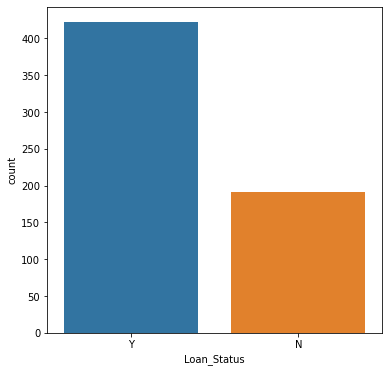

In [16]:
plt.figure(figsize=(6,6))
sns.countplot('Loan_Status',data=data)

In [17]:
#counting the number of male and female

In [18]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
#countig the data
data['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
data.replace(to_replace='3+',value=4,inplace=True)

In [21]:
data.Dependents.value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

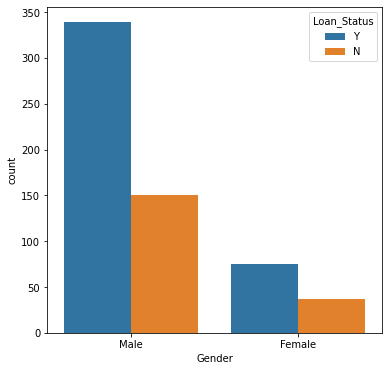

In [22]:
plt.figure(figsize=(6,6))
sns.countplot('Gender',data=data,hue='Loan_Status')

In [23]:
data[['Gender','Loan_Status']].value_counts()

Gender  Loan_Status
Male    Y              339
        N              150
Female  Y               75
        N               37
dtype: int64

In [24]:
#education vs loan_status

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

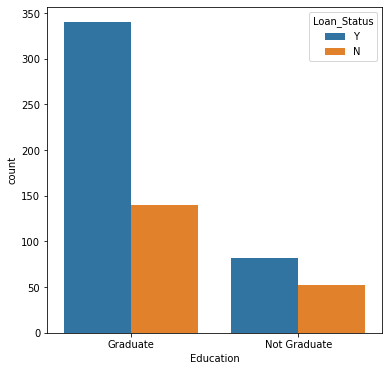

In [25]:
plt.figure(figsize=(6,6))
sns.countplot('Education',hue='Loan_Status',data=data)

In [26]:
#data cleaning

In [27]:
#finding the missing values in the data

In [31]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
#imputation method --method of replacing value mean value

In [33]:
#finding the percentage of missing value

In [34]:
a=data.isnull().sum()
b=len(data)
per=(a/b)*100
print(per)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [35]:

data.Dependents.mode()

0    0
Name: Dependents, dtype: object

In [36]:
#filling the missing value

In [37]:
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Married.fillna(data.Married.mode()[0],inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0],inplace=True)
data.LoanAmount.fillna(data.LoanAmount.mean(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)
data.Credit_History.fillna(data.Credit_History.mean(),inplace=True)


In [38]:
#checking for missing values

In [39]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [41]:
#EDA-data analysis

In [42]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [43]:
#label encoding-converting cateogrical text into numerical value
#creating dummies

In [44]:
gender=pd.get_dummies(data['Gender'],drop_first=True)
married=pd.get_dummies(data['Married'],drop_first=True)
education=pd.get_dummies(data['Education'],drop_first=True)
self_employed=pd.get_dummies(data['Self_Employed'],drop_first=True)
loan_status=pd.get_dummies(data['Loan_Status'],drop_first=True)
property_area=pd.get_dummies(data['Property_Area'],drop_first=True)

In [45]:
#dropping the columns
data2=data.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1)


In [46]:
data2

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,0,5849,0.0,146.412162,360.0,1.0
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0
4,LP001008,0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.000000,360.0,1.0
610,LP002979,4,4106,0.0,40.000000,180.0,1.0
611,LP002983,1,8072,240.0,253.000000,360.0,1.0
612,LP002984,2,7583,0.0,187.000000,360.0,1.0


In [47]:
#adding dummies into to the data2(using concatination)

In [48]:
data2=pd.concat([data2,gender,married,education,self_employed,property_area,loan_status],axis=1)

In [49]:
data2

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,1
610,LP002979,4,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0,1
611,LP002983,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1,1
612,LP002984,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,0,1,1


In [51]:
#seperating X and y data

In [50]:
X=data2.drop(['Y','Loan_ID'],axis=1)
y=data2.Y

In [52]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0
610,4,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,0,1


In [53]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Y, Length: 614, dtype: uint8

In [54]:
#splitting the data into train and test

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [56]:
X_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
270,0,3237,0.0,30.0,360.0,1.000000,0,0,0,0,0,1
557,4,10139,0.0,260.0,360.0,1.000000,1,1,0,1,1,0
248,1,2882,1843.0,123.0,480.0,1.000000,1,1,0,0,1,0
110,0,5316,0.0,136.0,360.0,1.000000,1,0,0,0,0,1
323,0,3166,2985.0,132.0,360.0,0.842199,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
132,0,2718,0.0,70.0,360.0,1.000000,1,0,0,0,1,0
292,2,3153,1560.0,134.0,360.0,1.000000,1,1,0,0,0,1
106,2,11417,1126.0,225.0,360.0,1.000000,1,1,0,0,0,1
105,1,3052,1030.0,100.0,360.0,1.000000,1,1,0,0,0,1


In [57]:
X_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
6,0,2333,1516.0,95.000000,360.0,1.0,1,1,1,0,0,1
202,4,3992,0.0,146.412162,180.0,1.0,1,1,1,0,0,1
170,0,1820,1769.0,95.000000,360.0,1.0,1,1,1,0,0,0
277,0,3103,1300.0,80.000000,360.0,1.0,1,1,0,0,0,1
373,1,3062,1987.0,111.000000,180.0,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
273,0,2620,2223.0,150.000000,360.0,1.0,1,1,0,0,1,0
581,0,1836,33837.0,90.000000,360.0,1.0,1,0,0,0,0,1
72,0,3500,0.0,81.000000,300.0,1.0,1,0,0,0,1,0
501,0,3159,0.0,100.000000,360.0,1.0,0,0,0,0,1,0


In [58]:
y_train

270    1
557    1
248    1
110    1
323    1
      ..
132    1
292    1
106    1
105    1
73     0
Name: Y, Length: 491, dtype: uint8

In [59]:
y_test

6      1
202    0
170    1
277    1
373    0
      ..
273    1
581    0
72     1
501    1
155    1
Name: Y, Length: 123, dtype: uint8

In [68]:
#building the model(model1)
#LOGISTICREGRESSION

In [69]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
#predicting the training values

In [71]:
y1_predict=model.predict(X_test)#test dataset
z1_predict=model.predict(X_train)#train dataset

In [72]:
y1_predict

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=uint8)

In [73]:
z1_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        38
           1       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



<AxesSubplot:>

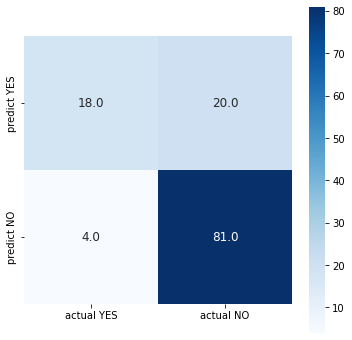

In [74]:
from sklearn.metrics import classification_report,confusion_matrix
C1=classification_report(y_test,y1_predict)
print(C1)
plt.figure(figsize=(6,6))
cf_matrix1=pd.DataFrame(confusion_matrix(y_test,y1_predict),columns=['actual YES','actual NO'],index=['predict YES','predict NO'])
sns.heatmap(cf_matrix1,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':12},cmap='Blues')



In [75]:

A1=accuracy_score(y_test,y1_predict)
print('accuracy_score:',A1)

accuracy_score: 0.8048780487804879


In [76]:

A2=accuracy_score(y_train,z1_predict)
print('accuracy_score:',A2)

accuracy_score: 0.814663951120163


In [77]:
#building the model(model2)
#decision tree classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
y2_predict=dtree.predict(X_test)
z2_predict=dtree.predict(X_train)

In [80]:
y2_predict

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=uint8)

In [81]:
z2_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

              precision    recall  f1-score   support

           0       0.54      0.68      0.60        38
           1       0.84      0.74      0.79        85

    accuracy                           0.72       123
   macro avg       0.69      0.71      0.70       123
weighted avg       0.75      0.72      0.73       123

AxesSubplot(0.125,0.1925;0.62x0.62)


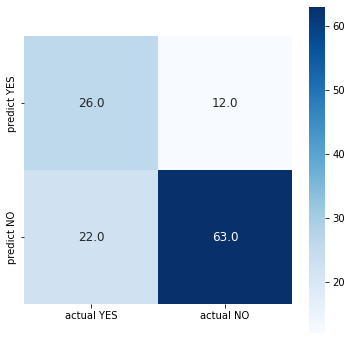

In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y2_predict))
cf_matrix2=pd.DataFrame(confusion_matrix(y_test,y2_predict),columns=['actual YES','actual NO'],index=['predict YES','predict NO'])
plt.figure(figsize=(6,6))
print(sns.heatmap(cf_matrix2,cbar=True,square=True,annot=True,fmt='0.1f',annot_kws={'size':12},cmap='Blues'))

In [83]:
#accuracy for test data
print('accuracy_score:',accuracy_score(y_test,y2_predict))

accuracy_score: 0.7235772357723578


In [85]:
#accuracy for train data
print('accuracy_score:',accuracy_score(y_train,z2_predict))

accuracy_score: 1.0


In [86]:
#building the model(model3)
#support vector machine classifier

In [87]:
from sklearn import svm
svmc=svm.SVC(kernel='linear')
svmc.fit(X_train,y_train)

SVC(kernel='linear')

In [88]:
y3_predict=svmc.predict(X_test)
z3_predict=svmc.predict(X_train)

In [89]:
y3_predict

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=uint8)

In [90]:
z3_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.80      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123

AxesSubplot(0.125,0.1925;0.62x0.62)


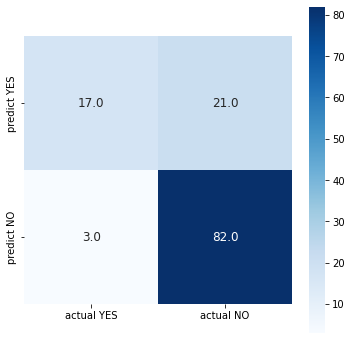

In [93]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y3_predict))
cf_matrix3=pd.DataFrame(confusion_matrix(y_test,y3_predict),columns=['actual YES','actual NO'],index=['predict YES','predict NO'])
plt.figure(figsize=(6,6))
print(sns.heatmap(cf_matrix3,cbar=True,square=True,annot=True,fmt='0.1f',annot_kws={'size':12},cmap='Blues'))

In [94]:
#accuracy score for test data
print('accuracy_score:',accuracy_score(y_test,y3_predict))

accuracy_score: 0.8048780487804879


In [102]:
#accuracy for training model

In [95]:

print('accuracy_score:',accuracy_score(y_train,z3_predict))

accuracy_score: 0.7820773930753564


In [96]:
#building the model(model4)
#randomforestclassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
y4_predict=rfr.predict(X_test)
z4_predict=rfr.predict(X_train)

In [99]:
y4_predict

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=uint8)

In [100]:
z4_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.81      0.92      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.79      0.80      0.79       123

AxesSubplot(0.125,0.1925;0.62x0.62)


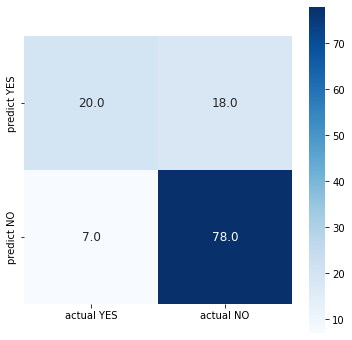

In [101]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y4_predict))
cf_matrix4=pd.DataFrame(confusion_matrix(y_test,y4_predict),columns=['actual YES','actual NO'],index=['predict YES','predict NO'])
plt.figure(figsize=(6,6))
print(sns.heatmap(cf_matrix4,cbar=True,square=True,annot=True,fmt='0.1f',annot_kws={'size':12},cmap='Blues'))

In [118]:
#accuracy for test data
print('accuracy_score:',accuracy_score(y_test,y4_predict))

accuracy_score: 0.8048780487804879


In [119]:
#accuracy_score for training data

In [102]:
print('accuracy_score:',accuracy_score(y_train,z4_predict))

accuracy_score: 1.0


In [105]:
table=pd.DataFrame({'model':['LogisticRegression','DecisionTree','SVMC','RandomForestClassifier'],
       'accuracy_score(training data)':[0.81,1.0,0.782,1.0],
       'accuracy_score(testing data)':[0.804,0.699,0.804,0.804] })

In [106]:
table

,model,accuracy_score(training data),accuracy_score(testing data)
0,LogisticRegression,0.810,0.804
1,DecisionTree,1.000,0.699
2,SVMC,0.782,0.804
3,RandomForestClassifier,1.000,0.804


In [107]:
#since RandomforestClassifier is giving better accuracy score compared to others,so using it to build prediction system

In [115]:
input_data=(X_test.values[0])
#chaning the dataset into array
input_data_np_array=np.asarray(input_data)
#reshaping the array
data.reshaped=input_data_np_array.reshape(1,-1)
prediction1=model.predict(data.reshaped)
print (prediction1)

if (prediction1[0]==0):
    print('loan is not promoted')
else:
    print('loan is promoted')

[1]
loan is promoted


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [121]:
print(y_test.values[0])

1


In [117]:
#both prediction and y_test are giving same values